In [1]:
from datetime import date
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from preprocessing import inout
from preprocessing import formatting
from preprocessing import preprocessing

from models import classifier

In [58]:
data0 = pd.read_csv('./data/0.csv',sep=',',header=None)
data0


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,-12.0,0.0,0.0,-7.0,-4.0,-3.0,-1.0,-5.0,4.0,-1.0,...,12.0,-3.0,0.0,2.0,-1.0,-1.0,4.0,-30.0,-20.0,0
2906,-9.0,-1.0,-2.0,1.0,-13.0,-14.0,-59.0,-4.0,-9.0,0.0,...,20.0,-4.0,0.0,0.0,0.0,-21.0,-10.0,-14.0,-29.0,0
2907,3.0,-2.0,-2.0,4.0,18.0,-5.0,-31.0,7.0,-3.0,-3.0,...,34.0,-7.0,4.0,4.0,2.0,1.0,4.0,-55.0,-4.0,0
2908,-2.0,-2.0,-2.0,1.0,-3.0,-17.0,-33.0,-13.0,3.0,2.0,...,-4.0,0.0,3.0,0.0,5.0,9.0,8.0,-13.0,11.0,0


In [59]:
data1 = pd.read_csv('./data/1.csv',sep=',',header=None)
data1

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-7.0,-1.0,-1.0,0.0,-10.0,-10.0,-1.0,1.0,-5.0,-5.0,...,6.0,-4.0,-3.0,-5.0,-3.0,15.0,11.0,-4.0,-5.0,1
1,-6.0,-2.0,-5.0,-2.0,27.0,42.0,3.0,5.0,11.0,1.0,...,2.0,-17.0,-5.0,-7.0,-2.0,15.0,12.0,0.0,-7.0,1
2,5.0,0.0,-1.0,-2.0,2.0,-9.0,1.0,5.0,1.0,-3.0,...,-11.0,-23.0,1.0,-1.0,-1.0,-23.0,-25.0,2.0,-1.0,1
3,31.0,4.0,2.0,-2.0,38.0,14.0,2.0,7.0,-2.0,4.0,...,-4.0,13.0,2.0,-1.0,-3.0,-7.0,0.0,-3.0,-2.0,1
4,-4.0,-4.0,3.0,3.0,-25.0,-46.0,-1.0,3.0,-7.0,-6.0,...,15.0,4.0,-4.0,-1.0,-1.0,7.0,26.0,3.0,-7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,0.0,1.0,-2.0,-2.0,-11.0,-12.0,-2.0,-9.0,-7.0,-3.0,...,-7.0,-6.0,-1.0,0.0,1.0,38.0,-8.0,0.0,4.0,1
2899,-4.0,-4.0,1.0,-1.0,-52.0,-4.0,-1.0,-2.0,9.0,-1.0,...,0.0,-4.0,3.0,1.0,8.0,17.0,0.0,0.0,-7.0,1
2900,26.0,2.0,0.0,-1.0,20.0,-1.0,1.0,-4.0,18.0,-1.0,...,-7.0,10.0,0.0,-3.0,2.0,34.0,42.0,3.0,6.0,1
2901,-3.0,4.0,7.0,4.0,-26.0,-32.0,-3.0,-2.0,5.0,1.0,...,1.0,-1.0,0.0,1.0,-1.0,4.0,1.0,0.0,-5.0,1


In [60]:
data2 = pd.read_csv('./data/2.csv',sep=',',header=None)
data2

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,4.0,19.0,-9.0,-7.0,-3.0,-36.0,-6.0,-23.0,3.0,-21.0,...,9.0,-14.0,-2.0,-3.0,-4.0,-21.0,7.0,-8.0,-12.0,2
1,-1.0,12.0,20.0,7.0,20.0,-73.0,-4.0,-2.0,4.0,5.0,...,-3.0,-5.0,-2.0,0.0,-4.0,-7.0,5.0,6.0,9.0,2
2,4.0,5.0,-8.0,-2.0,10.0,-10.0,-10.0,16.0,-3.0,-18.0,...,2.0,0.0,2.0,3.0,-8.0,19.0,20.0,0.0,-8.0,2
3,-3.0,-3.0,5.0,11.0,25.0,-20.0,-2.0,14.0,9.0,32.0,...,15.0,-2.0,16.0,6.0,9.0,1.0,31.0,16.0,4.0,2
4,-5.0,-9.0,-2.0,-5.0,-46.0,-34.0,-9.0,-4.0,0.0,8.0,...,-5.0,-11.0,-6.0,7.0,6.0,-10.0,-24.0,-6.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,1.0,-14.0,-5.0,-9.0,-10.0,4.0,-3.0,-4.0,3.0,4.0,...,22.0,8.0,28.0,-3.0,8.0,22.0,35.0,-1.0,-11.0,2
2939,-3.0,-8.0,-7.0,-7.0,-18.0,-49.0,-5.0,9.0,23.0,0.0,...,-8.0,8.0,17.0,9.0,-9.0,-1.0,-6.0,0.0,7.0,2
2940,-13.0,3.0,-4.0,-1.0,-7.0,15.0,-4.0,-6.0,-4.0,-9.0,...,6.0,-3.0,18.0,-2.0,-9.0,-11.0,-9.0,-4.0,22.0,2
2941,8.0,-24.0,-11.0,-7.0,21.0,23.0,0.0,6.0,-22.0,-10.0,...,-7.0,19.0,38.0,7.0,3.0,6.0,-5.0,-2.0,7.0,2


In [61]:
data3 = pd.read_csv('./data/3.csv',sep=',',header=None)
data3

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-22.0,-9.0,-6.0,-1.0,21.0,26.0,-2.0,5.0,5.0,0.0,...,-10.0,-15.0,-6.0,-3.0,3.0,20.0,25.0,1.0,1.0,3
1,-7.0,0.0,1.0,0.0,-13.0,-18.0,0.0,-9.0,-6.0,-2.0,...,-1.0,11.0,-4.0,-5.0,-4.0,3.0,-8.0,-7.0,-3.0,3
2,-6.0,-6.0,-6.0,-8.0,25.0,43.0,-4.0,7.0,6.0,1.0,...,3.0,2.0,1.0,3.0,-1.0,1.0,9.0,4.0,4.0,3
3,2.0,1.0,1.0,1.0,0.0,-23.0,2.0,-6.0,-1.0,-2.0,...,16.0,-3.0,-1.0,-1.0,-3.0,0.0,-3.0,4.0,3.0,3
4,0.0,3.0,4.0,5.0,1.0,25.0,-9.0,0.0,0.0,1.0,...,1.0,6.0,2.0,1.0,-3.0,-20.0,-42.0,-4.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
2918,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
2919,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
2920,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


In [2]:
######################## STEP 1 : reading and preprocessing data ########################
# data reading
data = formatting.read_data()
print(f'data shape: {data.shape} | label: {data.iloc[:, -1].unique()}')

# Train test splitting
# As our dataset has balanced class number we simply shuffle it and split it
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0, shuffle=True)
print(f'train data shape: {train_data.shape}')
print(f'test data shape: {test_data.shape}')
print(f'train data class number:\n {train_data[64].value_counts()}')
print(f'test data class number:\n {test_data[64].value_counts()}')

data shape: (11678, 65) | label: [0 1 2 3]
train data shape: (9342, 65)
test data shape: (2336, 65)
train data class number:
 2    2351
1    2346
0    2339
3    2306
Name: 64, dtype: int64
test data class number:
 3    616
2    592
0    571
1    557
Name: 64, dtype: int64


# Supervised Learning

## SVM model

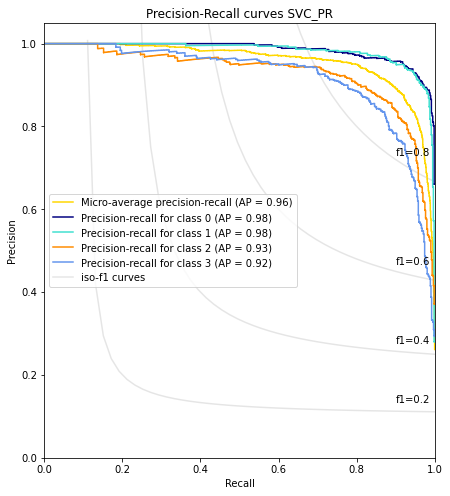

{'model__C': 100, 'model__kernel': 'rbf'}


In [3]:
model = classifier.SVMModel(train_data, test_data, preprocessing.basic_preprocessing)
param_grid = {"model__kernel": ["poly", "rbf"], "model__C": [0.1, 1, 100]}
# model.load('/home/yunfei/Desktop/ml-for-medical-data/saved_models/SVM')
model.grid_search(param_grid, n_fold=3)
model.evaluation('SVC_PR')
print(model.search.best_params_)

## Random Forest model

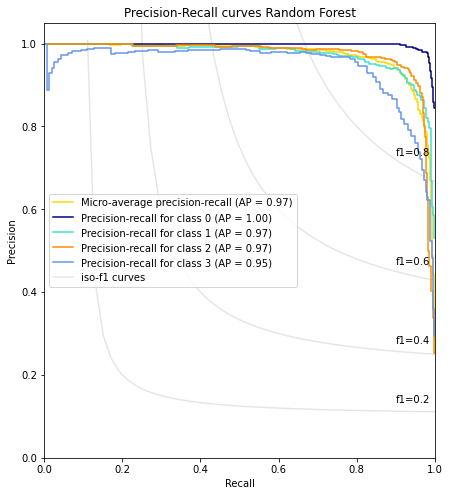

{'model__criterion': 'entropy', 'model__max_depth': None, 'model__n_estimators': 100}


In [ ]:
model = classifier.RFModel(train_data, test_data, preprocessing.basic_preprocessing)
param_grid = {"model__n_estimators": [100, 50], "model__criterion": ["gini", "entropy"], "model__max_depth":[None, 10]}
model.grid_search(param_grid, n_fold=3)
model.evaluation('Random Forest_PR')
print(model.search.best_params_)

## Logistic regression model

/home/yunfei/anaconda3/envs/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/yunfei/anaconda3/envs/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/yunfei/anaconda3/envs/3.8/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/yunfei/anaconda3/envs/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1

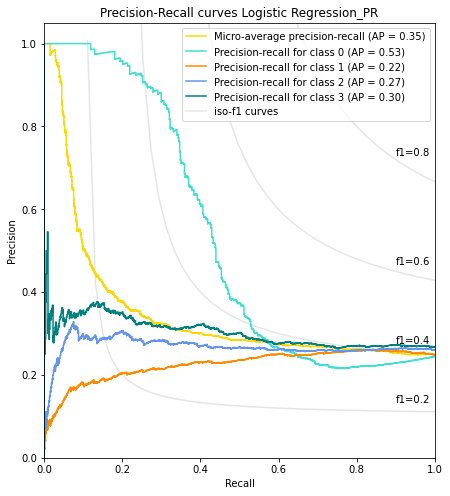

{'model__penalty': 'l1'}


In [ ]:
model = classifier.LRModel(train_data, test_data, preprocessing.basic_preprocessing)
param_grid = {"model__penalty": ['l1', 'l2', 'elasticnet', 'none']}
model.grid_search(param_grid, n_fold=3)
model.evaluation('Logistic Regression_PR')
print(model.search.best_params_)

#

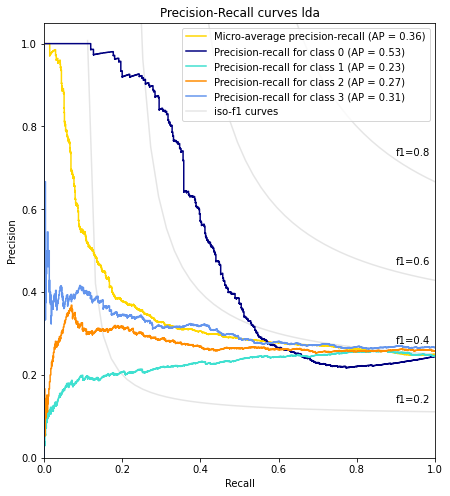

In [ ]:
model = classifier.lda(train_data, test_data, preprocessing.basic_preprocessing)
param_grid = {}
model.grid_search(param_grid, n_fold=3)
model.evaluation('lda')

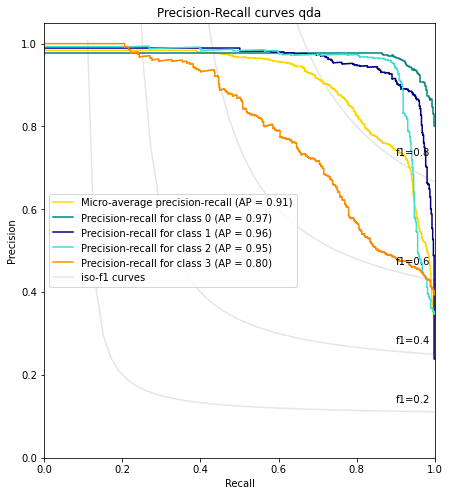

In [ ]:
model = classifier.qda(train_data, test_data, preprocessing.basic_preprocessing)
param_grid = {}
model.grid_search(param_grid, n_fold=3)
model.evaluation('qda')

/home/yunfei/anaconda3/envs/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yunfei/anaconda3/envs/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yunfei/anaconda3/envs/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


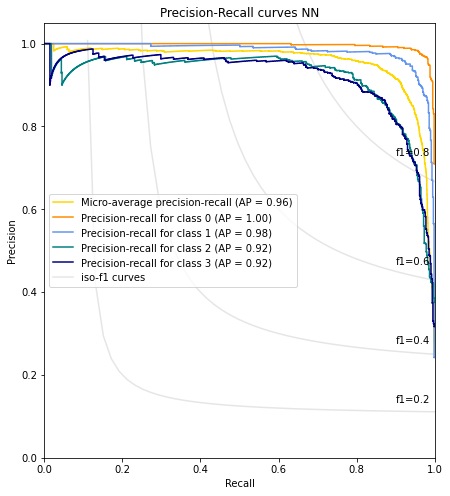

{'model__alpha': 0.1, 'model__batch_size': 100, 'model__hidden_layer_sizes': (32, 16, 8), 'model__max_iter': 100}


In [ ]:
model = classifier.sk_NN(train_data, test_data, preprocessing.basic_preprocessing)
param_grid = {'model__hidden_layer_sizes':[(10), (32, 16, 8)], 'model__alpha':[0, 0.1], 'model__max_iter':[100], 'model__batch_size':[100]}
model.grid_search(param_grid, n_fold=3)
model.evaluation('NN_PR')
print(model.search.best_params_)

In [5]:
from preprocessing.sequences import table2seq
import torch

# a = table2seq(torch.Tensor(train_data.iloc[:, 0:64].to_numpy()), 8, 8)


In [21]:
T = torch.Tensor(train_data.iloc[:, 0:64].to_numpy())

In [22]:
a = T.reshape(T.size(0), 8, 8).permute((1, 0, 2))

In [27]:

len(train_data)

9342

In [23]:
T.size()

torch.Size([9342, 64])

In [24]:
a.size()

torch.Size([8, 9342, 8])

In [25]:
a[0, 0, :]


tensor([  4., -10.,  -9., -28.,   4., -23., -23., -33.])

In [11]:
T[0]

tensor([  4., -10.,  -9., -28.,   4., -23., -23., -33.,  -4.,  -3.,  -9.,  -9.,
         11., -31.,  -7.,  57.,  16.,   1.,   8.,  13.,  -9.,  -3.,  12., -27.,
         -8.,   0.,   4.,  12.,   5.,  48.,  34., -23.,  20.,   8.,   6.,   2.,
        -16., -26.,   0.,  23.,  16.,  10.,   5.,  26.,  22.,  16.,  20., -23.,
         -6., -13.,  -3., -26.,  22.,  -5., -39.,  -3.,  -9.,  -3.,   1.,  23.,
        -11.,  17.,   4.,  -1.])